In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
data_df = pd.read_csv('../data/train.csv')
train_data = data_df.values
print("Train Data Shape is: ",train_data.shape)
data_df.head()

Train Data Shape is:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = train_data[:, 1:]
y = train_data[:, 0]
print('Data shape: ', X.shape)
print('Label shape: ', y.shape)

Data shape:  (42000, 784)
Label shape:  (42000,)


In [4]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
print('Standard Data shape:', X_std.shape)
X_std[:5, :]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Standard Data shape: (42000, 784)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
# for n_com in [0.92, 0.94, 0.95, 0.96]:
#     pca = PCA(n_components=n_com)
#     pca.fit(X_std)
#     X_std_pca = pca.transform(X_std)
#     print('Standard PCA n_components: {}, Data shape: {}'.format(n_com, X_std_pca.shape))

In [6]:
def find_SVC_hyper_param(X, y):
    param_grid = [
        {
            'C': [100, 10, 1],
            # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            # 'degree': [3, 4, 5],
            'gamma': ['auto', 0.1, 0.01, 0.001],
            # 'tol': [1e-3, 1e-4, 1e-5],
            # 'random_state': [0, 100, 200, 500]
        },
    ]
    grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1, verbose=1, cv=5)
    grid_search.fit(X, y)
    print('best_SVC_score', grid_search.best_score_)
    print('best_SVC_param', grid_search.best_params_)
    return grid_search.best_estimator_

In [7]:
pca = PCA(n_components=0.95)
pca.fit(X_std)
X_std_pca = pca.transform(X_std)
print('Standard PCA Data shape: ', X_std_pca.shape)

Standard PCA Data shape:  (42000, 320)


In [8]:
start_time = time.time()
best_svc = find_SVC_hyper_param(X_std_pca, y)
elapsed_time = time.time() - start_time
print('best_SVC_estimator', best_svc)
print("Time consumed to find hyper param: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 170.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 245.9min finished


best_SVC_score 0.9689285714285715
best_SVC_param {'C': 100, 'gamma': 0.001}
best_SVC_estimator SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Time consumed to find hyper param:  04:07:31


In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=1, random_state=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv, n_jobs=n_jobs, random_state=random_state)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

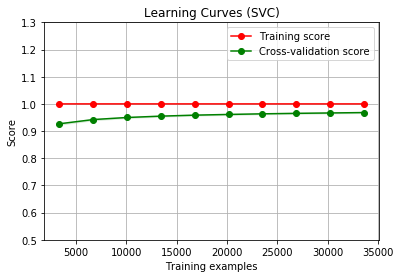

In [10]:
from sklearn.model_selection import ShuffleSplit, learning_curve

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=666)
title = 'Learning Curves (SVC)'
plot_learning_curve(best_svc, title, X_std_pca, y, ylim=(0.5, 1.3), train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, n_jobs=-1, random_state=666)